## Software Engineering

In [ ]:
# 계산기를 모듈화하여 구현
import time


class InputInterfaceModule:
    def check_inputs(self, x, y, operator, verbose):
        assert x.isnumeric(), "x is must be integer or float. not string or any"
        assert y.isnumeric(), "y is must be integer or float. not string or any"
        assert operator in ["+","-","*","/","//","%"], "operator is must be one of +,-,*,/,//,%"
        if verbose:
            print("expression confirmed")

class ResultInterfaceModule:
    def print_result(self, x, y, operator, result):
        print_result = f"Result: {x} {operator} {y} = {result}"
        print("="*len(print_result))
        print(print_result)
        print("="*len(print_result))

class CalculateModule(ResultInterfaceModule):
    def calculate(self, x, y, operator, verbose):
        if operator == "+":
            result = x + y
        elif operator == "-":
            result = x - y
        elif operator == "*":
            result = x * y
        elif operator == "/":
            result = x / y
        elif operator == "//":
            result = x // y
        elif operator == "%":
            result = x % y
        
        if verbose:
            self.print_result(x, y, operator, result)
        
        return result

class InputModule(InputInterfaceModule):
    def split_expression(self, expression, verbose):
        x, operator, y = expression.split()
        self.check_inputs(x, y, operator, verbose)  # check expression
        return int(x), int(y), operator

class Calculator(InputModule, CalculateModule):
    def __init__(self, verbose=1):
        self.verbose = verbose
        
        if self.verbose:
            print("Calculator is ready.")
        
    def execute(self, expression:str):
        if self.verbose:
            print("executing...")
        
        x, y, operator = self.split_expression(expression, self.verbose)
        return self.calculate(x, y, operator, self.verbose)

calculator = Calculator(verbose=1)
result = calculator.execute("1 * 1")

Calculator is ready.
executing...
expression confirmed
Result: 1 * 1 = 1


#### with 문

- @contextmanager, yield
- class의 \_\_enter\_\_, \_\_exit\_\_

In [11]:
import time
import contextlib

# 데코레이터 사용
@contextlib.contextmanager
def timing():
    print("yield 윗 부분 실행 됐지롱")
    t0 = time.time()  # with 문 시작할 때 실행
    yield
    print("yield 아랫 부분 실행 됐지롱")
    t1 = time.time()  # with 문 끝날 때 실행
    print(t1 - t0)

# 클래스 사용
class timer:
    def __init__(self):
        pass
    
    def __enter__(self):  # with 문 시작할 때 실행
        print("enter 시작 됐지롱")
        self.start = time.time()
    
    def __exit__(self, a, b, c):  # with 문 끝날 때 실행
        print("exit 시작 됐지롱")
        print(time.time() - self.start)

with timing():
    print("Hello")
    time.sleep(1)

time.sleep(0.5)
print("="*10)
time.sleep(0.5)

with timer():
    print("World")
    time.sleep(1)


yield 윗 부분 실행 됐지롱
Hello
yield 아랫 부분 실행 됐지롱
1.0012731552124023
enter 시작 됐지롱
World
exit 시작 됐지롱
1.0024480819702148


#### yield

- 파이썬은 사용자 정의 함수 def 안에 yield가 있으면 generator 라고 취급한다.
- def + return = function
- def + yield = generator

In [11]:
def range_r(number):
    for num in range(number):
        print("r")
        return num

def range_s(number):
    for num in range(number):
        print("s")
        yield num

range_r(10)
range_s(10)

r


<generator object range_s at 0x7fd943068270>

- generator 는 반복문을 이용해서 사용한다.

In [15]:
for item in range_s(10):
    print(f"item = {item}")

s
item = 0
s
item = 1
s
item = 2
s
item = 3
s
item = 4
s
item = 5
s
item = 6
s
item = 7
s
item = 8
s
item = 9


- 여기서 중요한 것은 반복문이 실행 되면서 매 번 item을 가져올 때, yield가 실행된 시점을 기억한다는 점이다.
    - ex) 첫번째 item을 가져오고 난 후 -> range_s(): "첫번째 반복, i=0이었고, yield 0을 했음"을 기억하고 다음 반복땐 yield가 끝난 지점부터 다시 시작한다.

- yield 를 여러번 선언하여 반복문을 통해 순차적으로 선언된 값을 출력할 수도 있다.

In [1]:
def yield_1():
    yield 1
    yield 12
    yield 123

for item in yield_1():
    print(item)

1
12
123


- 더이상 실행할 yield가 없거나 중간에 return 을 만난다면? -> generator 로써의 역할을 마침

In [2]:
# 이미 실행된 generator를 재사용하는 경우
def yield_1():
    yield 1
    yield 12
    yield 123

function = yield_1()

for item in function:
    print(item)

# function = yield_1()  # 한번 더 선언 해줘야 실행 가능

for item in function:  # 실행 안됨
    print(item)

1
12
123


In [3]:
# 중간에 return 이 선언된 경우
def yield_2():
    yield 1
    return 12
    yield 123  # pylance extension이 있다면 비활성화 표시가 보임

for item in yield_2():
    print(item)

1


- generator에서 item을 하나씩 접근하고 싶다면? -> next() 함수 사용

In [4]:
def yield_3():
    yield 1
    yield 12
    yield 123

function = yield_3()

print(f"item = {next(function)}")
print(f"item = {next(function)}")
print(f"item = {next(function)}")

item = 1
item = 12
item = 123


- @contextmanager 와 yield를 사용하여 실사용 예제를 수행해보자.

In [10]:
# 예시) 밑에 === 로 구분해놓은 함수 부분을 utils.py 라는 파일에 넣어 놓고
#      from utils import write_open 이런식으로 불러와 사용할 수 있다.
# ========================================
import os
from contextlib import contextmanager

@contextmanager
def write_open(path):
    dir_name = os.path.dirname(path)
    if not os.path.isdir(dir_name):
        os.makedirs(dir_name, exist_ok=True)
    writer = open(path, "w")
    print(1)  # 첫 번째 실행
    
    # -----------
    yield writer  # 기준
    # -----------
    
    writer.close()
    print(3)  # 세 번째 실행
# ========================================

with write_open("./test/test.txt") as f:
    f.write("test")
    print(2)  # 두 번째 실행
print(4)  # 네 번째 실행

1
2
3
4


#### lru_cache()

- 정의: "그거 이미 해봄ㅋ", "안돼"

In [6]:
import time
from functools import lru_cache

@lru_cache()
def think(idea):
    print(f"Hmm... {idea}")
    time.sleep(3)
    return "안돼"

- 이제 think 함수에 "pineapple pizza"와 "mint chocolate"을 전달 해보자.

In [7]:
print(think("pineapple pizza"))
print(think("mint chocolate"))

Hmm... pineapple pizza
안돼
Hmm... mint chocolate
안돼


- 위 두 번의 출력은 lru_cache()가 선언 되었든 아니든 상관 없이 기능상 문제가 없다.
- 그런데 여기서 think 함수에 "pineapple pizza"를 한번 더 전달한다면? -> 묻지도 따지지도 않고 return 값인 "안돼"를 반환한다. "mint chocolate"도 마찬가지이다.

In [8]:
print(think("pineapple pizza"))
print(think("pineapple pizza"))

print(think("mint chocolate"))
print(think("mint chocolate"))

안돼
안돼
안돼
안돼


- 이것이 바로 lru_cache()의 기능이다. 이미 결과를 구했던 입력에 대해서 다음번에 호출할 때에는 이미 구했었던 결과를 바로 리턴해준다.
- 이를 있어 보이는 말로 메모이제이션(memoization)이라고 부른다.
- 그렇다면 이런 기능을 실제로는 어떤 때에 활용할 수 있을까? -> 대표적으로 코딩테스트에서 DP(Dynamic Programming)문제를 풀 때, 사용 되는 기법이다.
- 또다른 편법은 lru_cache()를 재귀 함수와 함께 사용하면, 메모이제이션 효과를 내어 전체 실행 시간을 비약적으로 단축 시킬 수 있다.

In [9]:
# lru_cache() 미사용 -> SSAP 느림
import time


def fibonacci(x):
    if x <= 1:
        return x
    return fibonacci(x-1) + fibonacci(x-2)

start = time.time()
answer = fibonacci(35)
end = time.time()

print(end - start)
print(answer)

3.3081798553466797
9227465


In [10]:
# lru_cache() 사용 -> 이게 내가 알던 재귀함수가 맞나
import time
from functools import lru_cache


@lru_cache()
def fibonacci(x):
    if x <= 1:
        return x
    return fibonacci(x-1) + fibonacci(x-2)

start = time.time()
for i in range(71):
    print(fibonacci(i), end=" ")
end = time.time()

print()
print(end - start)

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 14930352 24157817 39088169 63245986 102334155 165580141 267914296 433494437 701408733 1134903170 1836311903 2971215073 4807526976 7778742049 12586269025 20365011074 32951280099 53316291173 86267571272 139583862445 225851433717 365435296162 591286729879 956722026041 1548008755920 2504730781961 4052739537881 6557470319842 10610209857723 17167680177565 27777890035288 44945570212853 72723460248141 117669030460994 190392490709135 
0.0007979869842529297


In [28]:
# 메모이제이션 직접 구현 버젼 -> 이게 내가 알던 재귀함수가 맞나..22
import time


def fibonacci(x, cache=dict()):
    if x in cache:
        return cache[x]
    if x <= 1:
        return x
    cache[x] = fibonacci(x-1) + fibonacci(x-2)
    return fibonacci(x-1) + fibonacci(x-2)

start = time.time()
for i in range(71):
    print(fibonacci(i), end=" ")
end = time.time()

print()
print(end - start)

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 14930352 24157817 39088169 63245986 102334155 165580141 267914296 433494437 701408733 1134903170 1836311903 2971215073 4807526976 7778742049 12586269025 20365011074 32951280099 53316291173 86267571272 139583862445 225851433717 365435296162 591286729879 956722026041 1548008755920 2504730781961 4052739537881 6557470319842 10610209857723 17167680177565 27777890035288 44945570212853 72723460248141 117669030460994 190392490709135 
0.0008327960968017578


In [29]:
# 리스트를 활용한 메모이제이션 기법 적용 -> 사실상 n값이 커질 수록 이 방법이 가장 효율적
import time


n = 70
start = time.time()
f = [0, 1] + [0]*(n-1)
for i in range(2, n+1):
    f[i] = f[i-1] + f[i-2]
for i in range(n+1):
    print(f[i], end=" ")
end = time.time()

print()
print(end - start)

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 14930352 24157817 39088169 63245986 102334155 165580141 267914296 433494437 701408733 1134903170 1836311903 2971215073 4807526976 7778742049 12586269025 20365011074 32951280099 53316291173 86267571272 139583862445 225851433717 365435296162 591286729879 956722026041 1548008755920 2504730781961 4052739537881 6557470319842 10610209857723 17167680177565 27777890035288 44945570212853 72723460248141 117669030460994 190392490709135 
0.0005519390106201172


#### Multi processing

In [11]:
def square(x):
    return x**2

In [12]:
import time


start = time.time()

for i in range(10000):
    print(f"\rs = {square(i)}", end="")

end = time.time()
print(f"\ntime = {end-start}")

s = 99980001
time = 0.0369570255279541


In [ ]:
from multiprocessing import Pool, cpu_count
import time


n_cpu = cpu_count()
print("Number of CPU:", n_cpu)
pools = Pool(n_cpu-1)

start = time.time()

for i in pools.imap(square, range(10000)):
    print(f"\rs = {i}", end="")

end = time.time()
print(f"\ntime = {end-start}")

#### 딕셔너리 활용법

In [1]:
# 라이브러리 미사용
text = "The policeman whose name is JOHN is going to the doughnut store "+\
    "JAMES aka doughnut master greeted JOHN and poke to JOHN"

words = text.split(" ")
name_count = {}
for word in words:
    if word.isupper():
        if word in name_count:
            name_count[word] += 1
        else:
            name_count[word] = 1
        
print(name_count)

{'JOHN': 3, 'JAMES': 1}


In [12]:
# defaultdict 라이브러리 사용
from collections import defaultdict
text = "The policeman whose name is JOHN is going to the doughnut store "+\
    "JAMES aka doughnut master greeted JOHN and poke to JOHN"

words = text.split(" ")
# key가 없어서 에러가 발생하는 상황이라면 name_count[key] = 0을 몰래 미리 수행한다.
name_count = defaultdict(int) # or lambda: n 으로 임의의 초기값을 설정할 수도 있다.
print(name_count)
for word in words:
    if word.isupper():
        name_count[word] += 1
        
print(dict(name_count))

defaultdict(<class 'int'>, {})
{'JOHN': 3, 'JAMES': 1}


In [2]:
# defaultdict 없이 직접 구현 -> 잔기술
text = "The policeman whose name is JOHN is going to the doughnut store "+\
    "JAMES aka doughnut master greeted JOHN and poke to JOHN"

words = text.split(" ")
name_count = {}
for word in words:
    if word.isupper():
        name_count.get(word) or name_count.update({word:0})  # and/or 연산자의 특성: 앞에서 이미 답이 정해졌다면, 뒤는 보지 않는다.
        name_count[word] += 1
        
print(name_count)

{'JOHN': 3, 'JAMES': 1}


In [13]:
d = {1:1}
if d.get(1) or 9/0:
    print(True)

True


In [14]:
d = {}
if d.get(1) and 9/0:
    print(True)

In [15]:
d = {}
a = "apple"
a == "apple" and d.update({2:2})
# if a == "apple":
#   d.update({2:2})
d

{2: 2}

In [ ]:
a = "apple"
b = ""
a == "apple" and (b := "pineapple")
# if a == "apple": 
#   d.update({2:2})
b

'pineapple'

In [72]:
a = None
b = None
class Node:
    def __init__(self, value=0, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

class Solution:
    def isSubtree(self, root, subRoot):
        if root is None or subRoot is None:
            return root is None and subRoot is None
        
        return self.is_equal(root, subRoot) or self.isSubtree(root.left, subRoot) or self.isSubtree(root.right, subRoot)

    def is_equal(self, root, subRoot):
        if root is None or subRoot is None:
            return root is None and subRoot is None
        
        return root.value == subRoot.value and self.is_equal(root.left, subRoot.left) and self.is_equal(root.right, subRoot.right)

True

In [36]:
def calculate_intersection_over_union(bounding_box_a, bounding_box_b, epsilon=1e-6):
    '''
    PASCAL VOC format:
    bounding_box = [class, confidence, x_min, y_min, x_max, y_max]
    '''
    
    # intersection
    x1 = max(bounding_box_a[2], bounding_box_b[2])
    y1 = max(bounding_box_a[3], bounding_box_b[3])
    x2 = min(bounding_box_a[4], bounding_box_b[4])
    y2 = min(bounding_box_a[5], bounding_box_b[5])

    width = x2 - x1
    height = y2 - y1
    
    if width < 0 or height < 0:
        return 0.0
    
    overlapped_area = width * height
    
    # union
    bounding_box_a_width = bounding_box_a[4] - bounding_box_a[2]
    bounding_box_a_height = bounding_box_a[5] - bounding_box_a[3]
    area_bounding_box_a = bounding_box_a_width * bounding_box_a_height
    
    bounding_box_b_width = bounding_box_b[4] - bounding_box_b[2]
    bounding_box_b_height = bounding_box_b[5] - bounding_box_b[3]
    area_bounding_box_b = bounding_box_b_width * bounding_box_b_height
    
    combined_area = area_bounding_box_a + area_bounding_box_b - overlapped_area
    
    intersection_over_union = overlapped_area / (combined_area+epsilon)
    return round(intersection_over_union, 4)

prediction_bbox = [200, 200, 400, 400]
ground_truth_bbox = [250, 250, 450, 450]

iou = calculate_intersection_over_union(prediction_bbox, ground_truth_bbox)
print(iou)

0.3913


In [17]:
def descending_confidences(detections):
    '''
    detection = [TP(1) or FP(0), confidence]
    detections = [detection1, detection2, ...]
    '''
    result = []
    # insertion sort
    for detection in detections:
        result.append(detection)
        if len(result) > 1 and result[-2][1] < result[-1][1]:
            i = -1
            while i != -len(result) and result[i-1][1] < result[i][1]:
                result[i-1], result[i] = result[i], result[i-1]
                i -= 1
    return result

detections = [[1, 0.58], [1, 0.95], [0, 0.5], [0, 0.12], [1, 0.33]]
print(detections)
print(descending_confidences(detections))

[[1, 0.58], [1, 0.95], [0, 0.5], [0, 0.12], [1, 0.33]]
[[1, 0.95], [1, 0.58], [0, 0.5], [1, 0.33], [0, 0.12]]


In [16]:
def get_precision(true_positives, detections, epsilon=1e-6):
    return round(true_positives / (detections+epsilon), 4)

def get_recall(true_positives, ground_truths, epsilon=1e-6):
    return round(true_positives / (ground_truths+epsilon), 4)

def get_precision_recall_curve(detections, ground_truths):
    new_detections = []
    for 
    pass


SyntaxError: invalid syntax (2012057327.py, line 9)

In [1]:
detections = [[1, 0.58], [1, 0.95], [0, 0.5], [0, 0.12], [1, 0.33]]
for i in range(-1, -11, -1):
    print(i)
    if i == -len(detections):
        break


-1
-2
-3
-4
-5


In [2]:
def forward(x, f, h, returns):
    xf = x + f
    fh = f + h
    xfh = xf + fh
    result = xfh // 2
    
    variables = locals()
    return [variables[r] for r in returns]

a, b = forward(1, 2, 3, ["xf", "result"])
print(a, b)

3 4


In [47]:
# r: 공비
# a_1: 초항
# a_n: n차항
r = 3
a_1 = 1
a_n = 27
answer = (r * a_n - a_1) // (r - 1)
print(answer)

40


In [13]:
import math
# 1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1
n = 10
k = 10
n_fac = math.factorial(n)
k_fac = math.factorial(k)
print(n_fac, k_fac, k_fac*math.factorial(n-k), n_fac//(k_fac*math.factorial(n-k)))

3628800 3628800 3628800 1


In [11]:
round(0.06 * (1/6), 3)

0.01

In [12]:
5000/365

13.698630136986301

In [13]:
1.0/1.6180339887

0.618033988768953

In [14]:
159727223 / 159848137

0.9992435695387554

In [15]:
(510100000 / 5120)**0.5

315.6404699179115

In [16]:
# 6.9mm x 35mm
69384/2

34692.0

In [50]:
a2 = 510100000 / 5120
a = a2 ** 0.5
b = 1.5197 * a
h = 1.1361 * a
triangle = 1/2 * b * h

print(a2, a, b, h, triangle)

99628.90625 315.6404699179115 479.67882213425014 358.59913787373927 86006.20603681641


In [17]:
import math

def calculate_equilateral_triangle(square_side_a):
    """
    정사각형의 한 변(a)을 입력받아, 동일한 넓이를 갖는 
    정삼각형의 밑변(b)과 높이(h)를 계산하고 검증합니다.
    """
    # 1. 정사각형 넓이
    area_square = square_side_a ** 2
    
    # 2. 정삼각형 밑변(b)과 높이(h) 계산 (유도된 공식 사용)
    # 3의 네제곱근은 3 ** 0.25 혹은 math.sqrt(math.sqrt(3))으로 표현 가능
    fourth_root_3 = 3 ** 0.25
    
    base_triangle = (2 * square_side_a) / fourth_root_3
    height_triangle = fourth_root_3 * square_side_a
    
    # 3. 정삼각형 넓이 계산 (검증용)
    area_triangle = 0.5 * base_triangle * height_triangle
    
    return base_triangle, height_triangle, area_square, area_triangle

# 테스트: 정사각형 한 변이 10인 경우
a = 315.6404699179115
b, h, area_sq, area_tri = calculate_equilateral_triangle(a)

print(f"정사각형 한 변 (a): {a}")
print(f"정사각형 넓이: {area_sq:.4f}")
print("-" * 30)
print(f"정삼각형 밑변 (b): {b:.4f}")
print(f"정삼각형 높이 (h): {h:.4f}")
print(f"정삼각형 넓이: {area_tri:.4f}")

# 검증
assert math.isclose(area_sq, area_tri), "넓이가 일치하지 않습니다."
print("-" * 30)
print("Result: 검증 완료 (넓이 일치)")

정사각형 한 변 (a): 315.6404699179115
정사각형 넓이: 99628.9062
------------------------------
정삼각형 밑변 (b): 479.6698
정삼각형 높이 (h): 415.4062
정삼각형 넓이: 99628.9062
------------------------------
Result: 검증 완료 (넓이 일치)


In [31]:
(693840*113000*113000), (5040*91349655), (693840*113000*113000) - (5040*91349655)

(8859642960000000, 460402261200, 8859182557738800)

In [10]:
f[0]*f[1]

129000

In [53]:
a = [5, 25000]
b = [25, 5500]
c = [70, 4500]
d = [100, 3200]
e = [150, 860]
f = [150, 730]

count = a[0]+b[0]+c[0]+d[0]+e[0]+f[0]
budget = (a[0]*a[1]) + (b[0]*b[1]) + (c[0]*c[1]) + (d[0]*d[1]) + (e[0]*e[1]) + (f[0]*f[1])
count, budget

(500, 1136000)

In [54]:
# 초기값 ₩1,000,000 에서 4년동안 매일 1% 씩 값이 증가했을 때, 4년 후 값은 약 2조 380억이다.
import time


def test(x, ratio, days):
    for _ in range(days):
        x = round(x + (x * ratio))
        print(f"\rx = ₩ {x:3,}", end="")
        time.sleep(0.001)

test(1000000, 0.01, 365*4)

x = ₩ 2,038,005,710,216

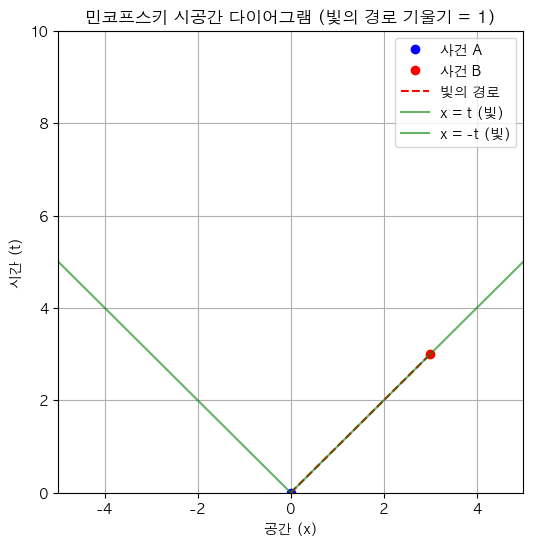

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 설정: 시공간 축
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-5, 5)
ax.set_ylim(0, 10)

# 라벨 및 격자
ax.set_xlabel('공간 (x)')
ax.set_ylabel('시간 (t)')
ax.grid(True)
ax.set_title('민코프스키 시공간 다이어그램 (빛의 경로 기울기 = 1)')

# 원점에 있는 사건 A
event_A = (0, 0)
ax.plot(*event_A, 'bo', label='사건 A')

# 빛이 이동할 수 있는 사건 B (시공간 간격이 0인 경우)
event_B = (3, 3)  # Δx = Δt → s^2 = 0
ax.plot(*event_B, 'ro', label='사건 B')

# 사건 A → 사건 B 를 잇는 선 (빛의 경로)
ax.plot([event_A[0], event_B[0]], [event_A[1], event_B[1]], 'r--', label='빛의 경로')

# 빛의 경로들: x = ±t
t_vals = range(0, 11)
light_path_1 = [t for t in t_vals]  # x = t
light_path_2 = [-t for t in t_vals]  # x = -t
ax.plot(light_path_1, t_vals, 'g-', alpha=0.6, label='x = t (빛)')
ax.plot(light_path_2, t_vals, 'g-', alpha=0.6, label='x = -t (빛)')

ax.legend()
plt.show()

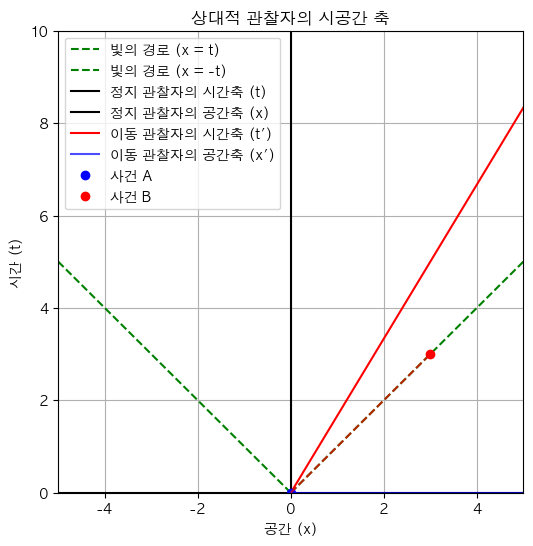

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 설정: 상대 속도 (v는 빛의 속도의 비율로 정규화, 즉 v/c)
v = 0.6  # 예: 관찰자가 0.6c의 속도로 움직임
gamma = 1 / np.sqrt(1 - v**2)

# 관찰자의 축
# 이동 관찰자의 시간축: x = v * t (즉, t축이 기울어짐)
t_vals = np.linspace(0, 10, 100)
x_time_moving = v * t_vals  # 시간축 (worldline)
x_space_moving = t_vals / v  # 공간축 (x'축은 관찰자의 동시성)

# 기본 시공간 다이어그램
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-5, 5)
ax.set_ylim(0, 10)
ax.set_xlabel('공간 (x)')
ax.set_ylabel('시간 (t)')
ax.grid(True)
ax.set_title('상대적 관찰자의 시공간 축')

# 빛의 경로
ax.plot(t_vals, t_vals, 'g--', label='빛의 경로 (x = t)')
ax.plot(-t_vals, t_vals, 'g--', label='빛의 경로 (x = -t)')

# 정지 관찰자의 축
ax.plot([0, 0], [0, 10], 'k-', label='정지 관찰자의 시간축 (t)')
ax.plot([-5, 5], [0, 0], 'k-', label='정지 관찰자의 공간축 (x)')

# 이동 관찰자의 축
ax.plot(x_time_moving, t_vals, 'r-', label="이동 관찰자의 시간축 (t')")
ax.plot(t_vals, x_space_moving * 0, 'b-', label="이동 관찰자의 공간축 (x')", alpha=0.7)

# 사건 A (원점)과 사건 B (빛으로 연결됨)
event_A = (0, 0)
event_B = (3, 3)
ax.plot(*event_A, 'bo', label='사건 A')
ax.plot(*event_B, 'ro', label='사건 B')
ax.plot([event_A[0], event_B[0]], [event_A[1], event_B[1]], 'r--', alpha=0.7)

ax.legend()
plt.show()


/Users/csh/opt/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


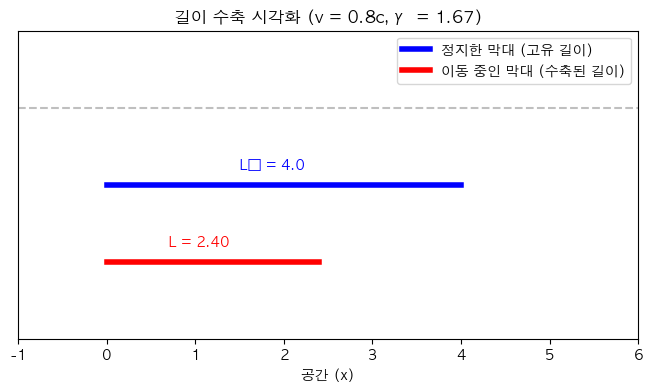

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 이동 속도 설정
v = 0.8  # 80% 빛의 속도
gamma = 1 / np.sqrt(1 - v**2)

# 고유 길이 (정지 상태의 길이)
L0 = 4.0  # 예: 4 단위 길이

# 수축된 길이 계산
L_moving = L0 / gamma

# 그래프 초기화
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(-1, 6)
ax.set_ylim(0, 2)
ax.set_yticks([])
ax.set_xlabel('공간 (x)')
ax.set_title(f'길이 수축 시각화 (v = {v}c, γ = {gamma:.2f})')

# 정지한 막대 (고유 길이)
ax.plot([0, L0], [1, 1], 'b-', lw=4, label='정지한 막대 (고유 길이)')
ax.text(L0/2 - 0.5, 1.1, f"L₀ = {L0}", color='b')

# 움직이는 막대 (수축된 길이)
ax.plot([0, L_moving], [0.5, 0.5], 'r-', lw=4, label='이동 중인 막대 (수축된 길이)')
ax.text(L_moving/2 - 0.5, 0.6, f"L = {L_moving:.2f}", color='r')

# 기준선
ax.axhline(1.5, color='gray', linestyle='--', alpha=0.5)
ax.legend()
plt.show()


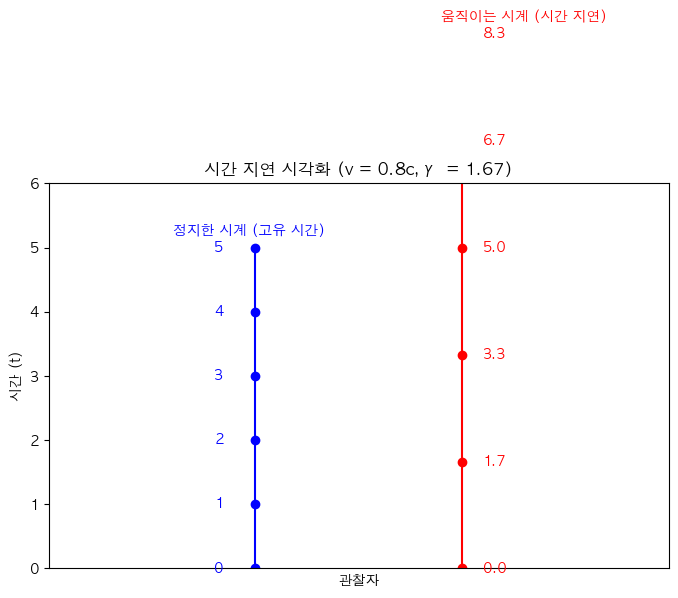

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 속도 설정
v = 0.8
gamma = 1 / np.sqrt(1 - v**2)

# 시간 간격 설정
proper_times = np.array([0, 1, 2, 3, 4, 5])  # 고유 시간
dilated_times = gamma * proper_times        # 느려진 시간

# 시각화
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_ylim(0, 6)
ax.set_xlim(-1, 2)
ax.set_xticks([])
ax.set_xlabel('관찰자')
ax.set_ylabel('시간 (t)')
ax.set_title(f'시간 지연 시각화 (v = {v}c, γ = {gamma:.2f})')

# 정지 시계 (고유 시간)
ax.vlines(x=0, ymin=0, ymax=5, colors='b', linestyles='-')
for t in proper_times:
    ax.plot(0, t, 'bo')
    ax.text(-0.2, t, f'{t}', color='b', va='center')

# 움직이는 시계 (시간 지연)
ax.vlines(x=1, ymin=0, ymax=dilated_times[-1], colors='r', linestyles='-')
for t in dilated_times:
    ax.plot(1, t, 'ro')
    ax.text(1.1, t, f'{t:.1f}', color='r', va='center')

# 범례
ax.text(-0.4, 5.2, '정지한 시계 (고유 시간)', color='b')
ax.text(0.9, dilated_times[-1] + 0.2, '움직이는 시계 (시간 지연)', color='r')
plt.show()


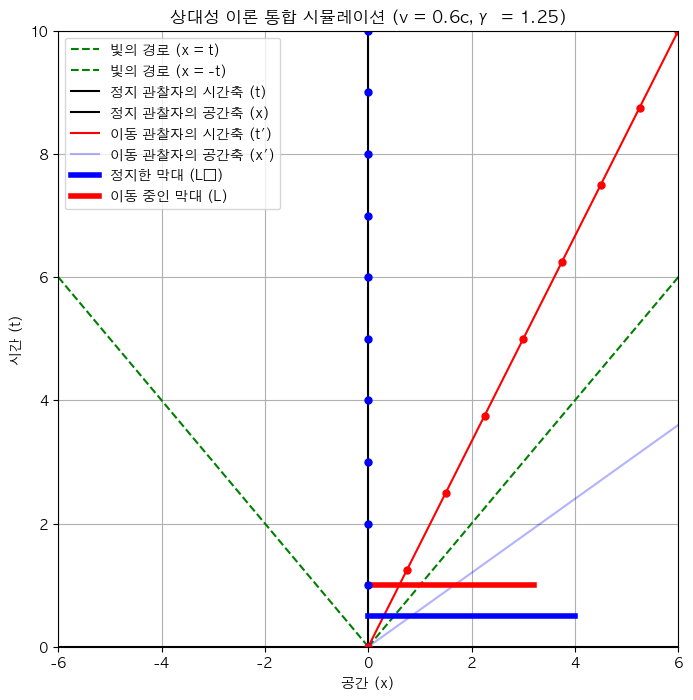

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 설정: 상대 속도
v = 0.6
gamma = 1 / np.sqrt(1 - v**2)

# 시간 범위
t_max = 10
t_vals = np.linspace(0, t_max, 100)

# 움직이는 시계의 틱 간격 (proper time)
ticks_proper = np.arange(0, t_max + 1, 1)
ticks_dilated = gamma * ticks_proper

# 시공간 도표 생성
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-6, 6)
ax.set_ylim(0, 10)
ax.set_xlabel('공간 (x)')
ax.set_ylabel('시간 (t)')
ax.set_title(f'상대성 이론 통합 시뮬레이션 (v = {v}c, γ = {gamma:.2f})')
ax.grid(True)

# 빛의 경로 (x = ±t)
ax.plot(t_vals, t_vals, 'g--', label='빛의 경로 (x = t)')
ax.plot(-t_vals, t_vals, 'g--', label='빛의 경로 (x = -t)')

# 정지한 관찰자의 축
ax.plot([0, 0], [0, t_max], 'k-', label='정지 관찰자의 시간축 (t)')
ax.plot([-6, 6], [0, 0], 'k-', label='정지 관찰자의 공간축 (x)')

# 이동하는 관찰자의 축
x_time_moving = v * t_vals
ax.plot(x_time_moving, t_vals, 'r-', label="이동 관찰자의 시간축 (t')")
ax.plot(t_vals, [v * t for t in t_vals], 'b-', alpha=0.3, label="이동 관찰자의 공간축 (x')")

# 길이 수축 시각화 (움직이는 막대)
L0 = 4  # 고유 길이
L_moving = L0 / gamma
# 정지한 막대 (x축 위)
ax.plot([0, L0], [0.5, 0.5], 'b-', lw=4, label='정지한 막대 (L₀)')
# 움직이는 막대 (수축된 길이, 순간 동시성 기준)
ax.plot([0, L_moving], [1, 1], 'r-', lw=4, label='이동 중인 막대 (L)')

# 시간 지연: 정지 시계와 이동 시계의 틱 표시
for t in ticks_proper:
    ax.plot(0, t, 'bo', markersize=5)
for t in ticks_dilated:
    ax.plot(v * t, t, 'ro', markersize=5)

ax.legend()
plt.show()


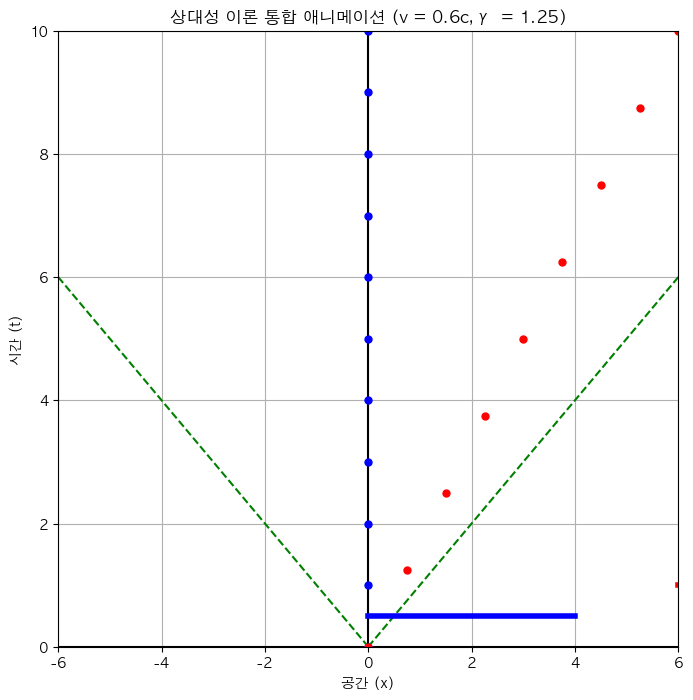

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# 설정
v = 0.6
gamma = 1 / np.sqrt(1 - v**2)
t_max = 10
num_frames = 100
t_vals = np.linspace(0, t_max, num_frames)
ticks_proper = np.arange(0, t_max + 1, 1)
ticks_dilated = gamma * ticks_proper
L0 = 4
L_moving = L0 / gamma

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-6, 6)
ax.set_ylim(0, t_max)
ax.set_xlabel('공간 (x)')
ax.set_ylabel('시간 (t)')
ax.set_title(f'상대성 이론 통합 애니메이션 (v = {v}c, γ = {gamma:.2f})')
ax.grid(True)
ax.plot([0, 0], [0, t_max], 'k-')
ax.plot([-6, 6], [0, 0], 'k-')
ax.plot(t_vals, t_vals, 'g--')
ax.plot(-t_vals, t_vals, 'g--')
static_bar, = ax.plot([0, L0], [0.5, 0.5], 'b-', lw=4)
moving_bar, = ax.plot([], [], 'r-', lw=4)
static_ticks, = ax.plot([], [], 'bo', markersize=5)
moving_ticks, = ax.plot([], [], 'ro', markersize=5)

def init():
    moving_bar.set_data([], [])
    static_ticks.set_data([], [])
    moving_ticks.set_data([], [])
    return moving_bar, static_ticks, moving_ticks

def update(frame):
    t = t_vals[frame]
    x0 = v * t
    moving_bar.set_data([x0, x0 + L_moving], [1, 1])
    static_tick_times = ticks_proper[ticks_proper <= t]
    static_ticks.set_data([0]*len(static_tick_times), static_tick_times)
    moving_tick_times = ticks_dilated[ticks_dilated <= t]
    moving_xs = v * moving_tick_times
    moving_ticks.set_data(moving_xs, moving_tick_times)
    return moving_bar, static_ticks, moving_ticks

ani = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init,
                              blit=True, interval=100, repeat=False)
HTML(ani.to_jshtml())


/var/folders/0v/jgsvzrwn19qddwrlyh8yj77c0000gn/T/ipykernel_3349/3775622116.py:50: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  plt.tight_layout()
/Users/csh/opt/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


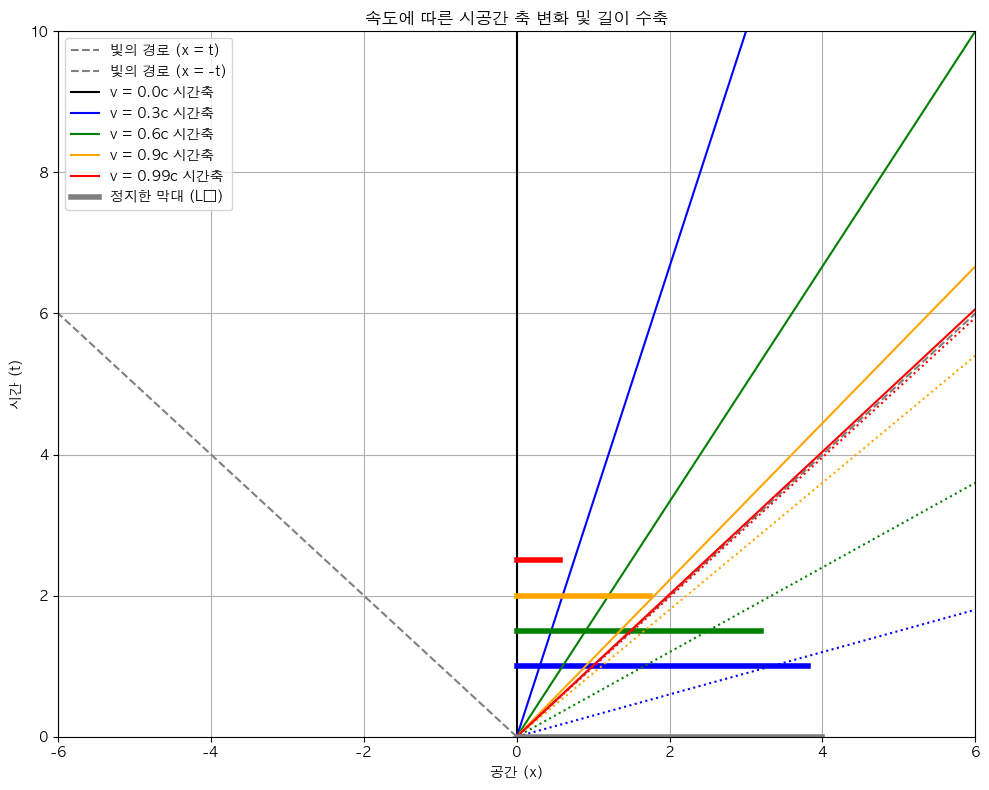

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 속도 목록 (빛의 속도에 대한 비율)
velocities = [0.0, 0.3, 0.6, 0.9, 0.99]
colors = ['black', 'blue', 'green', 'orange', 'red']

# 시공간 도표 설정
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-6, 6)
ax.set_ylim(0, 10)
ax.set_xlabel('공간 (x)')
ax.set_ylabel('시간 (t)')
ax.set_title('속도에 따른 시공간 축 변화 및 길이 수축')
ax.grid(True)

# 빛의 경로 (x = ±t)
t_vals = np.linspace(0, 10, 100)
ax.plot(t_vals, t_vals, 'gray', linestyle='--', label='빛의 경로 (x = t)')
ax.plot(-t_vals, t_vals, 'gray', linestyle='--', label='빛의 경로 (x = -t)')

# 고유 길이
L0 = 4

# 속도별로 시공간 축과 길이 수축 막대 그리기
for i, v in enumerate(velocities):
    gamma = 1 / np.sqrt(1 - v**2) if v != 1.0 else np.inf
    color = colors[i]
    
    # 시간축 (x = vt)
    t_line = np.linspace(0, 10, 100)
    x_time = v * t_line
    ax.plot(x_time, t_line, color=color, label=f"v = {v}c 시간축")
    
    # 공간축 (t = vx)
    x_line = np.linspace(-6, 6, 100)
    if v != 0:
        t_space = x_line * v
        ax.plot(x_line, t_space, color=color, linestyle=':')
    
    # 길이 수축 막대
    if v != 0:
        L_contracted = L0 / gamma
        ax.plot([0, L_contracted], [0.5 + i*0.5]*2, color=color, lw=4)

# 정지한 막대
ax.plot([0, L0], [0.5 - 0.5]*2, color='gray', lw=4, label='정지한 막대 (L₀)')

ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
x = -0.618
for _ in range(100):
    x = 1 + (1.0/x)
    print(x)

-0.6181229773462784
-0.6178010471204185
-0.6186440677966112
-0.6164383561643809
-0.6222222222222291
-0.6071428571428394
-0.6470588235294599
-0.5454545454544306
-0.8333333333337194
-0.19999999999944418
-4.0000000000138956
0.7500000000008684
2.3333333333317894
1.4285714285717122
1.6999999999998612
1.5882352941176952
1.6296296296296107
1.6136363636363709
1.619718309859152
1.6173913043478272
1.6182795698924726
1.6179401993355484
1.6180698151950716
1.618020304568528
1.6180392156862746
1.6180319922443043
1.6180347513481128
1.6180336974634326
1.6180341000114429
1.618033946251768
1.6180340049827353
1.6180339825495016
1.6180339911182342
1.6180339878452696
1.618033989095431
1.6180339886179118
1.618033988800308
1.6180339887306388
1.61803398875725
1.6180339887470856
1.6180339887509678
1.618033988749485
1.6180339887500514
1.618033988749835
1.6180339887499178
1.618033988749886
1.6180339887498982
1.6180339887498936
1.6180339887498953
1.6180339887498947
1.618033988749895
1.618033988749895
1.6180339887